Building Your Neural Network for classifying numbers

Now import the packages from the Keras library:

In [8]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, Activation, BatchNormalization,Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras import utils as np_utils
import numpy as np

In [9]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train = (x_train.astype(np.float32))/255.0
x_test = (x_test.astype(np.float32))/255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
input_shape = x_train.shape[1:]
print(input_shape)
print(x_train.shape)

(28, 28, 1)
(60000, 28, 28, 1)


In [15]:
model = Sequential()
model.add(Dense(512, input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(),metrics=['accuracy'])
ckpt = ModelCheckpoint('Models/model.h5', save_best_only=True,monitor='val_loss', mode='min', save_weights_only=False)
model.fit(x_train, y_train,batch_size=64,epochs=10,verbose=1,validation_data=(x_test, y_test),callbacks=[ckpt])

Epoch 1/10
938/938 [==============================] - 1873s 2s/step - loss: 1.0774 - accuracy: 0.6570 - val_loss: 0.4140 - val_accuracy: 0.8739
Epoch 2/10
938/938 [==============================] - 1876s 2s/step - loss: 0.5422 - accuracy: 0.8324 - val_loss: 0.3408 - val_accuracy: 0.8986
Epoch 3/10
938/938 [==============================] - 1965s 2s/step - loss: 0.4411 - accuracy: 0.8664 - val_loss: 0.3366 - val_accuracy: 0.9007
Epoch 4/10
938/938 [==============================] - 2104s 2s/step - loss: 0.3839 - accuracy: 0.8856 - val_loss: 0.3545 - val_accuracy: 0.8930
Epoch 5/10
938/938 [==============================] - 10104s 11s/step - loss: 0.3406 - accuracy: 0.8987 - val_loss: 0.3605 - val_accuracy: 0.8908
Epoch 6/10
938/938 [==============================] - 2065s 2s/step - loss: 0.3090 - accuracy: 0.9074 - val_loss: 0.3590 - val_accuracy: 0.8914
Epoch 7/10
938/938 [==============================] - 8309s 9s/step - loss: 0.2826 - accuracy: 0.9144 - val_loss: 0.3535 - val_accurac

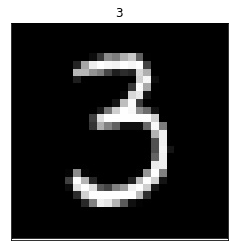

In [18]:
import cv2 
from matplotlib import pyplot as plt
imgLoaded = cv2.imread('three.png',0)
img = cv2.resize(imgLoaded, (28, 28))
img = (img.astype(np.float32))/255.0
img = img.reshape(1, 28, 28, 1)
plt.imshow(imgLoaded,'gray')
plt.title(np.argmax(model.predict(img)[0]))
plt.xticks([]),plt.yticks([])
plt.show()